In [1]:
#!/usr/bin/python3.10

Prerequisites: pandas, xlrd, matplotlib, rpy2

# HSMC modelling

## Configuration
### It is assumed that this notebook is run from StructureAnalysis/sequence_analysis/tutorials

**Import OpenAlea packages**

In [2]:
from openalea.stat_tool import _stat_tool
from openalea.sequence_analysis import _sequence_analysis
from openalea.sequence_analysis.hidden_semi_markov import HiddenSemiMarkov
from openalea.sequence_analysis.simulate import Simulate
from openalea.sequence_analysis.data_transform import Thresholding

from openalea.stat_tool.data_transform import *
from openalea.stat_tool.cluster import Cluster
from openalea.stat_tool.cluster import Transcode, Cluster

import openalea.stat_tool.plot #import DISABLE_PLOT
from openalea.stat_tool.plot import DISABLE_PLOT
DISABLE_PLOT = False

import os

from openalea.stat_tool.output import plot, Plot

plot.DISABLE_PLOT = DISABLE_PLOT

from openalea.stat_tool.plot import get_plotter, mplotlib 

##### Check pandas version

In [3]:
# print pd.__version__

In [4]:
import xlrd
xlrd.__version__

'2.0.1'

For correct figure rendering

In [5]:
%matplotlib inline

##### Enabling R extensions

In [6]:
%load_ext rpy2.ipython

#####  Place variables in markdown outputs

In [7]:
from IPython.display import Markdown
from IPython.core.magic import register_cell_magic


@register_cell_magic
def markdown(line, cell):
    return Markdown(cell.format(**globals()))

## Determining if images have to be saved (not used for the moment)

## Loading and preparing data

In [8]:
import sys, os

In [9]:
sys.path

['/home/jdurand/devlp/Git/openalea/StructureAnalysis',
 '/home/jdurand/miniforge3/envs/openalea/lib/python310.zip',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/lib-dynload',
 '',
 '/home/jdurand/.local/lib/python3.10/site-packages',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/OpenAlea.SConsX-2.4.0-py3.9.egg',
 '/home/jdurand/devlp/Git/openalea/StructureAnalysis/sequence_analysis/src',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/OpenAlea.StatTool-2.0.0-py3.10-linux-x86_64.egg',
 '/home/jdurand/devlp/Git/openalea/StructureAnalysis/stat_tool/src',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/openalea.deploy-3.1.2-py3.10.egg']

In [10]:
sys.path.append(".." + os.sep + "tutorials")

In [11]:
# TODO: fix this
# get_shared_data("data")

In [12]:
from pathlib import Path
from openalea.sequence_analysis import __path__ as seq_path
data_path = Path(seq_path[0])
data_path = str(Path.joinpath(data_path.parent.parent.parent.absolute(), "share","data"))


# Estimate HSMC with nonparametric emission distributions

**Read an existing HSMC model**

In [13]:
model_file = "test_hidden_semi_markov.dat"

f = open(data_path + os.sep + model_file, "r")
f.close()

hsm = HiddenSemiMarkov(data_path + os.sep + model_file)

In [14]:
from openalea.sequence_analysis import Estimate
from openalea.sequence_analysis import seq_map    

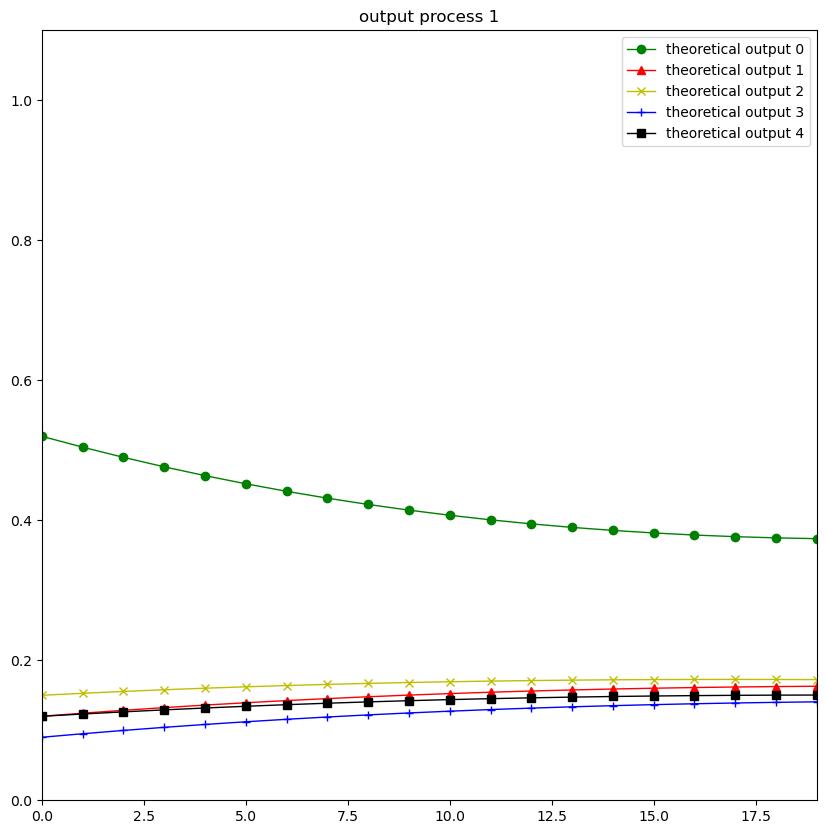

In [15]:
hsm.plot("Intensity", 1)

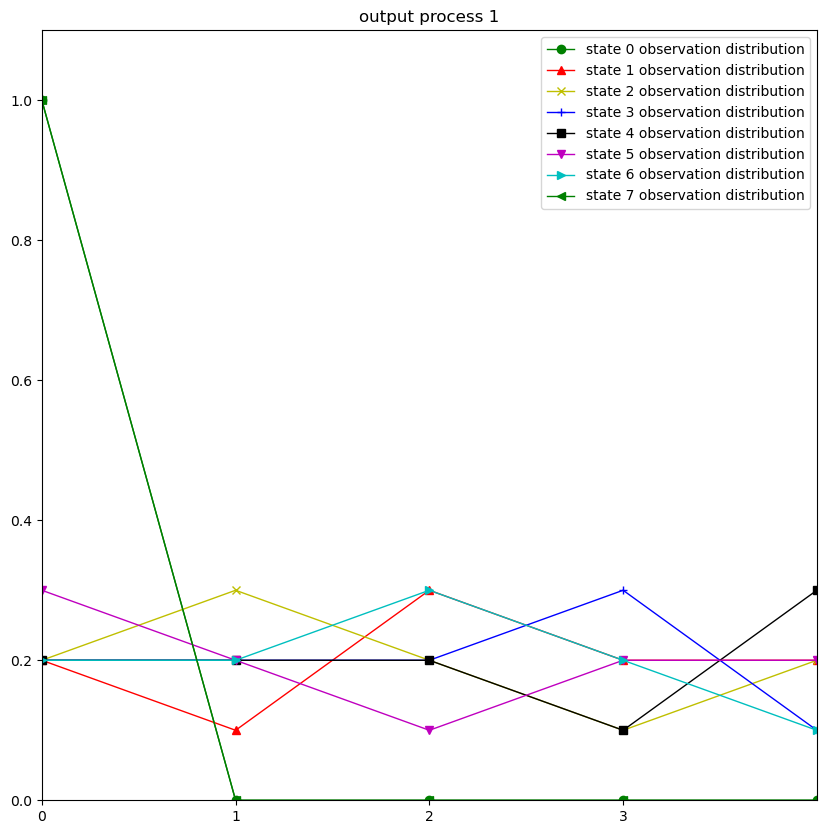

In [16]:
hsm.plot("Observation", 1)

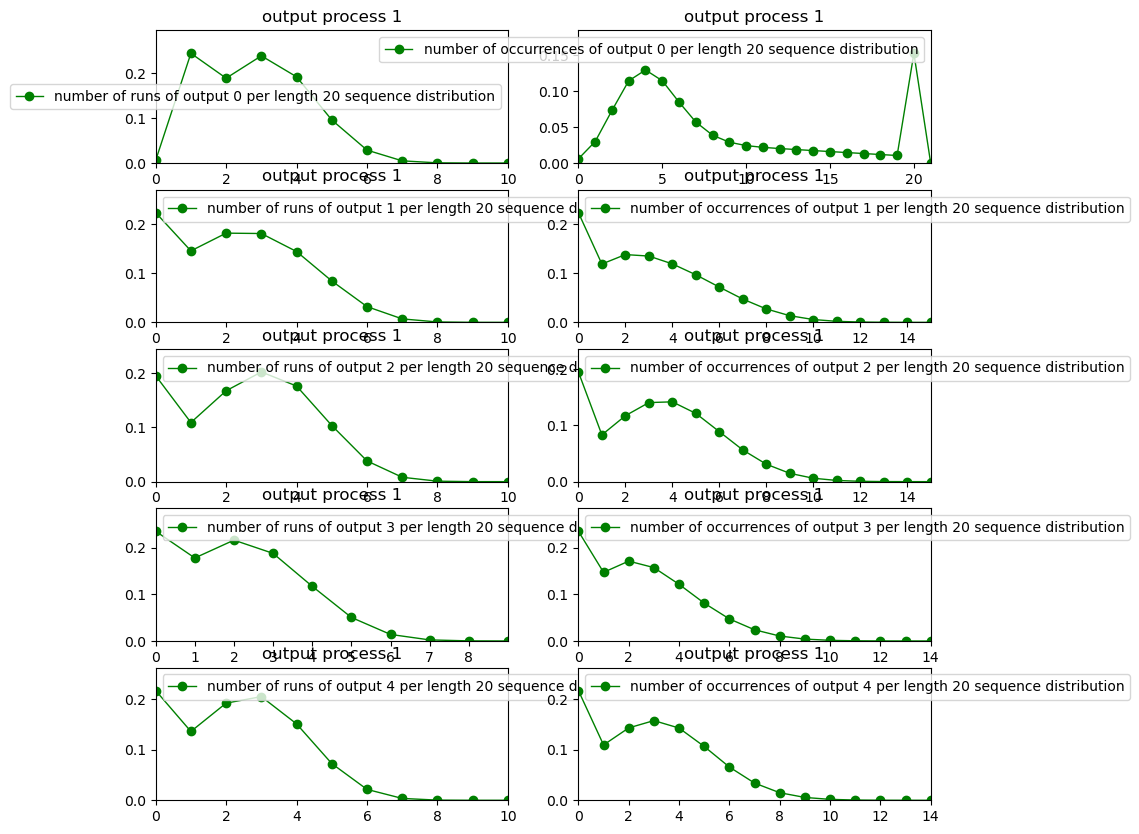

In [17]:
hsm.plot("Counting", 1)

In [18]:
# Note that hsm.plot("Counting", 1)  replaces hsm.plot("NbRun", 1) and hsm.plot("NbOccurrence", 1)

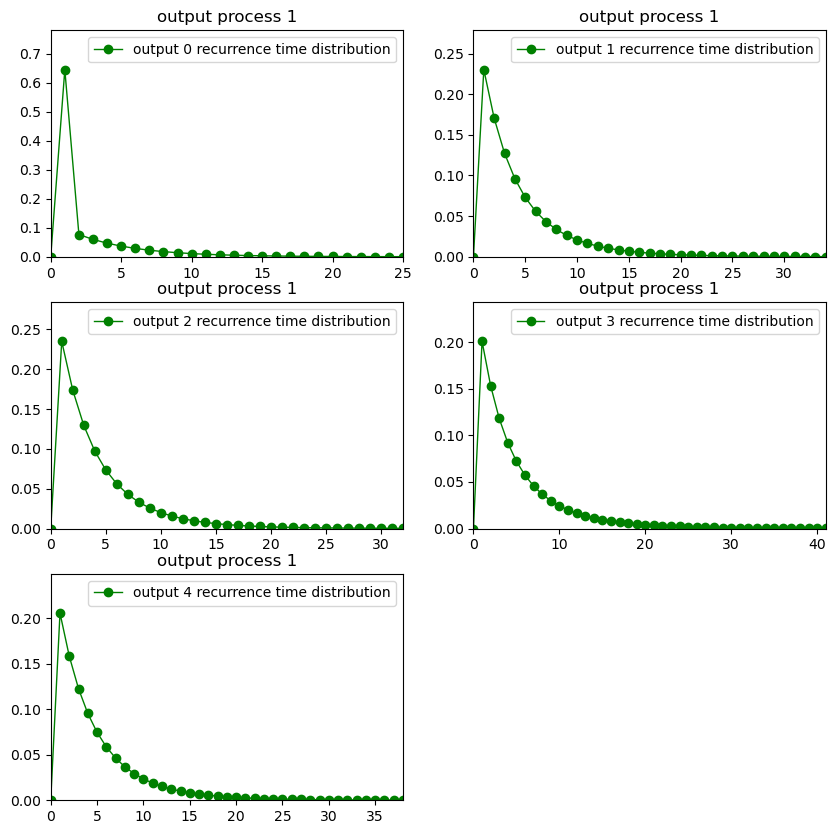

In [19]:
hsm.plot("Recurrence", 1)


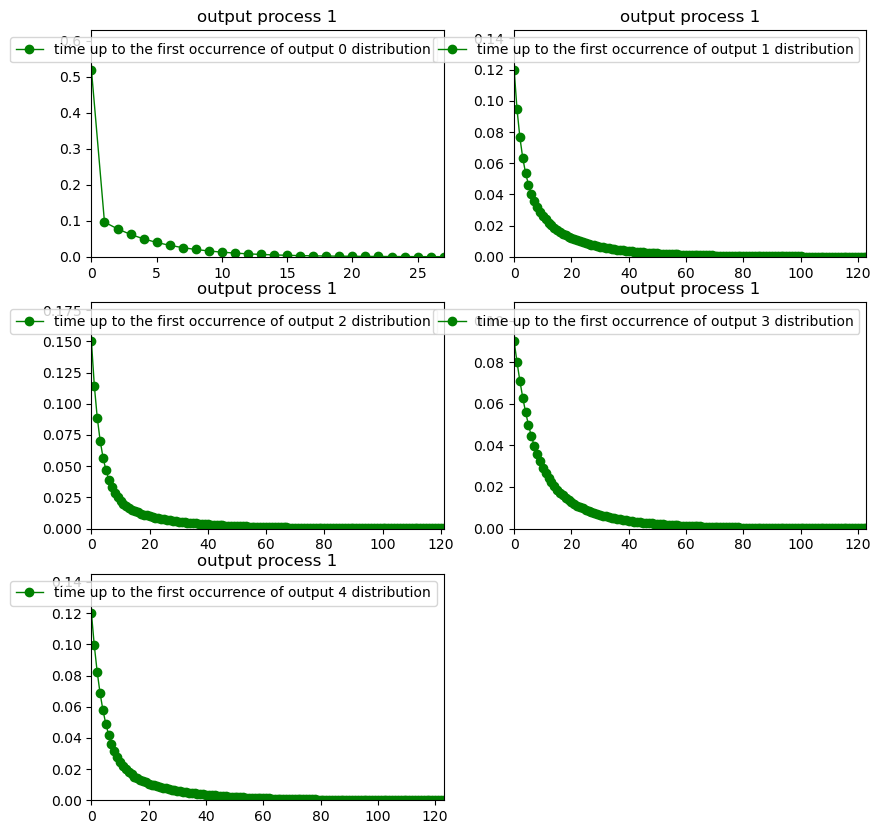

In [20]:
hsm.plot("FirstOccurrence", 1)

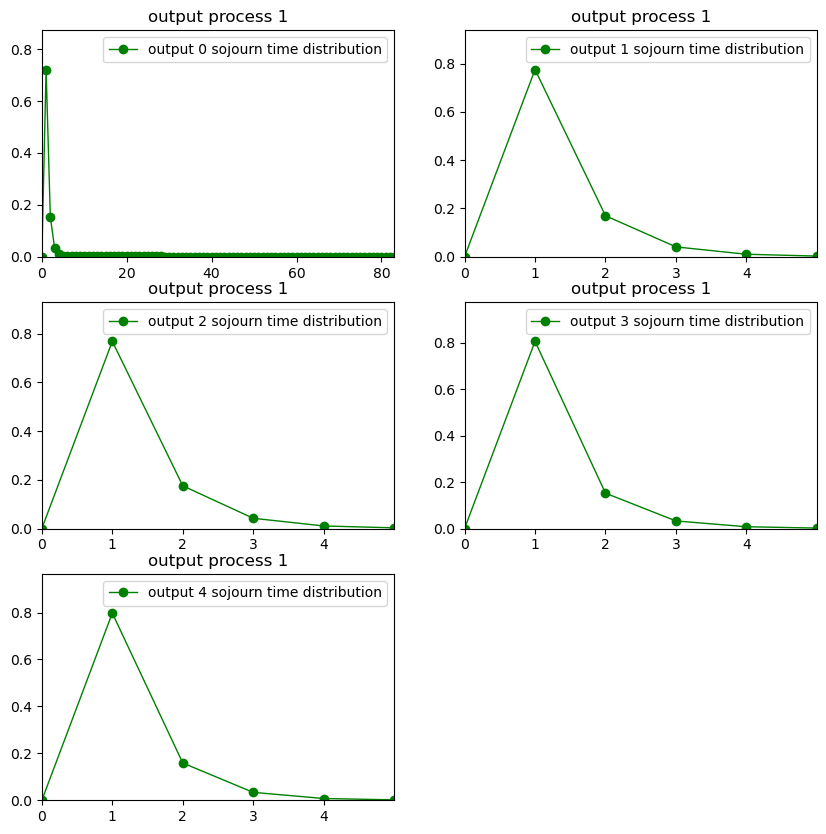

In [21]:
hsm.plot("Sojourn", 1)

In [22]:
# hsm.plot()

**Simulate sequences**

In [23]:
from openalea.sequence_analysis import Simulate

In [24]:
from openalea.stat_tool.distribution import set_seed
set_seed(0)

Simulate *nb_seq* sequences with length *seq_length*

In [25]:
nb_seq = 30
seq_length = 100
seq = hsm.simulation_nb_sequences(nb_seq, seq_length, True)
assert(len(seq) == nb_seq)
assert(len(seq[0]) == seq_length)
# NB: hsm has 1 output process but simulation includes the hidden state
assert(len(seq[0][1]) == 2)


N.o. initial states in parallel: 1


In [26]:
seq = hsm.simulation_nb_sequences(nb_seq, seq_length, True)


N.o. initial states in parallel: 1


In [27]:
# Print first simulated sequence.
# First variable is the simulated state
print(seq[0])

[[1, 4], [1, 3], [1, 0], [1, 2], [1, 2], [1, 1], [1, 4], [1, 0], [1, 1], [1, 4], [1, 3], [1, 3], [1, 3], [1, 1], [1, 2], [1, 3], [1, 1], [1, 4], [1, 2], [1, 2], [1, 4], [1, 0], [1, 0], [1, 3], [1, 1], [1, 0], [1, 1], [1, 0], [1, 1], [1, 0], [1, 2], [1, 3], [1, 4], [1, 3], [1, 0], [1, 2], [1, 0], [1, 2], [1, 2], [1, 0], [1, 3], [1, 3], [1, 2], [1, 4], [1, 2], [1, 2], [1, 0], [3, 1], [3, 3], [3, 1], [3, 3], [6, 1], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0]]


Discard variable 1 (state)

In [28]:
obs = seq.select_variable([1], keep=False)

## Plotting marginal probabilities of data

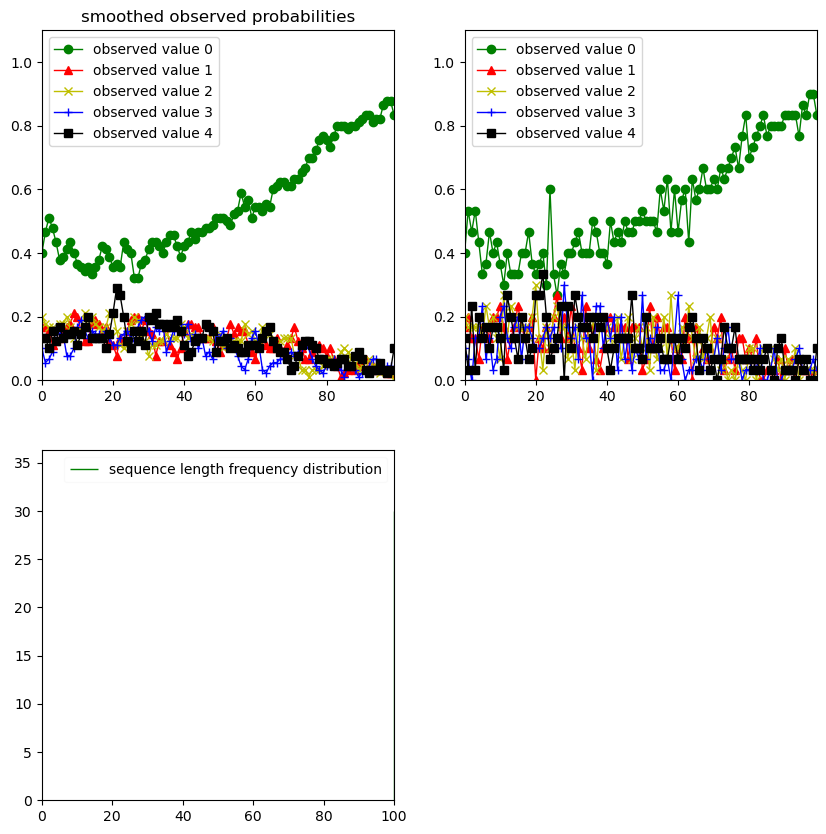

In [29]:
# Variable 1
obs.plot("Intensity", 0)

## HSCM re-estimation

### Reestimate from default initialisation

In [30]:
from openalea.sequence_analysis import Estimate
nb_states = 8

hsmc_est = Estimate(obs, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "LeftRight", Nbiteration=300)   
print(hsmc_est.display())

0
HIDDEN_SEMI-MARKOV_CHAIN

8 STATES

INITIAL_PROBABILITIES
0.392168   0.211256   0.0849307  0.0882364  0.223388   1e-05      1e-05      0          

TRANSITION_PROBABILITIES
0          1e-05      0.181573   1e-05      0.57504    1e-05      0.0845286  0.158828   
0          0          1e-05      0.549445   0.317319   0.133206   1e-05      1e-05      
0          0          0          1e-05      1e-05      0.99996    1e-05      1e-05      
0          0          0          0          1e-05      0.99997    1e-05      1e-05      
0          0          0          0          0          0.919854   0.0801364  1e-05      
0          0          0          0          0          0          0.982026   0.0179745  
0          0          0          0          0          0          0          1          
0          0          0          0          0          0          0          1          

transient class: state 0
transient class: state 1
transient class: state 2
transient class: state 3
transient cl

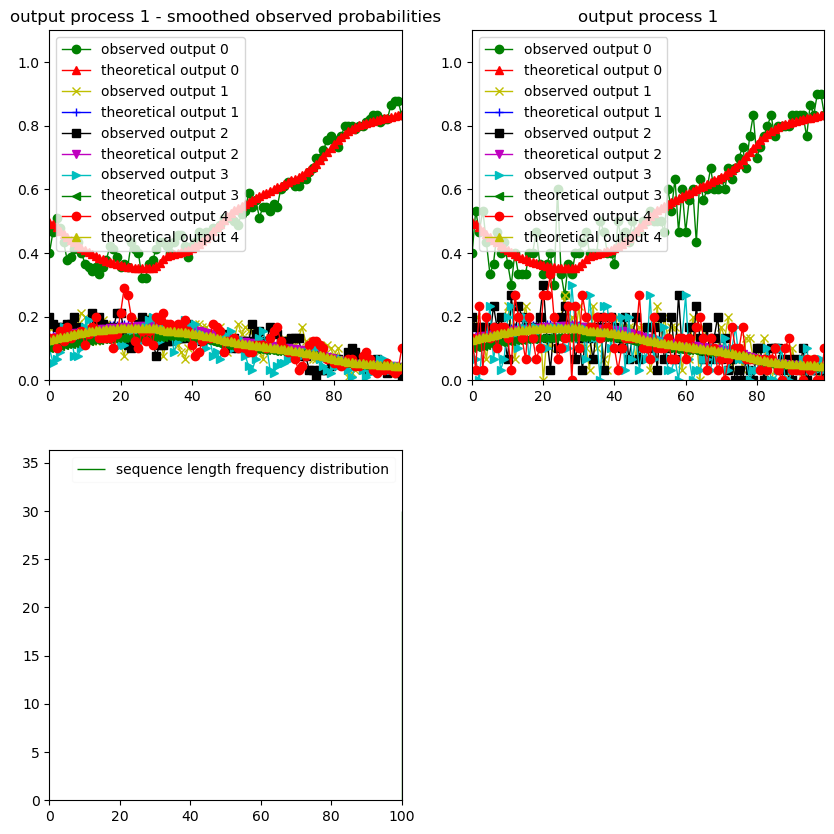

In [31]:
hsmc_est.plot("Intensity", 1)

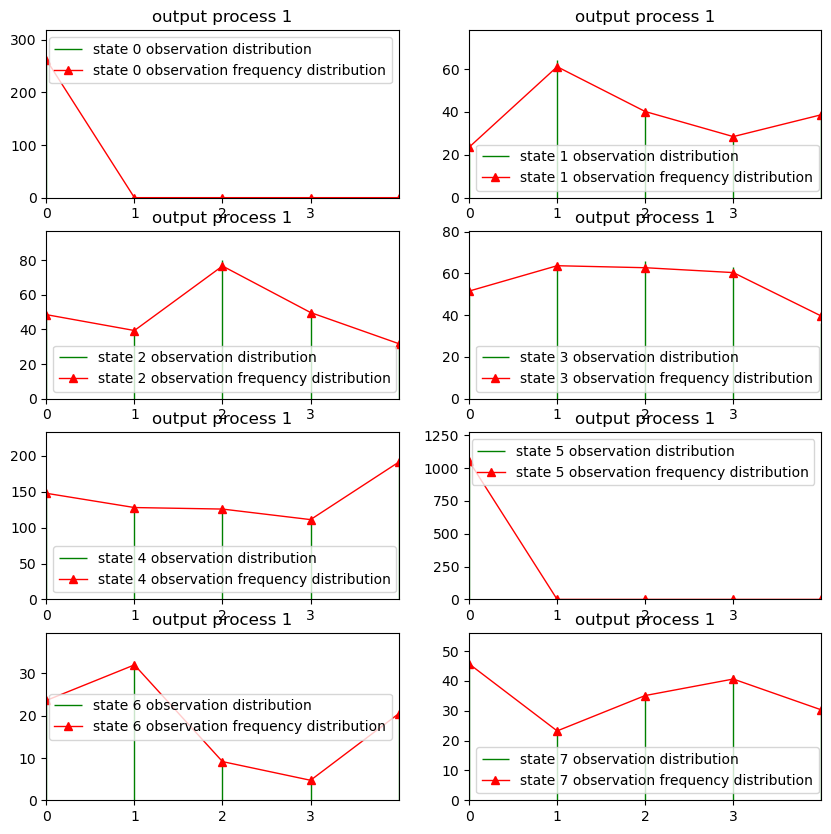

In [32]:
hsmc_est.plot("Observation", 1)


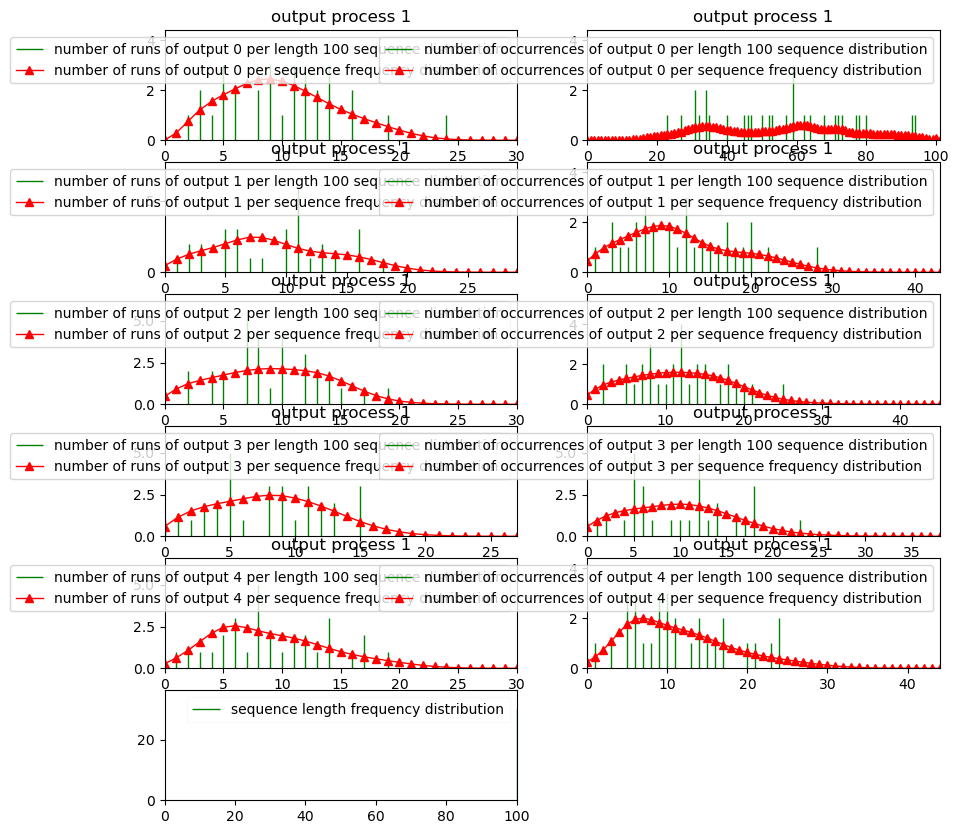

In [33]:
hsmc_est.plot("Counting", 1)


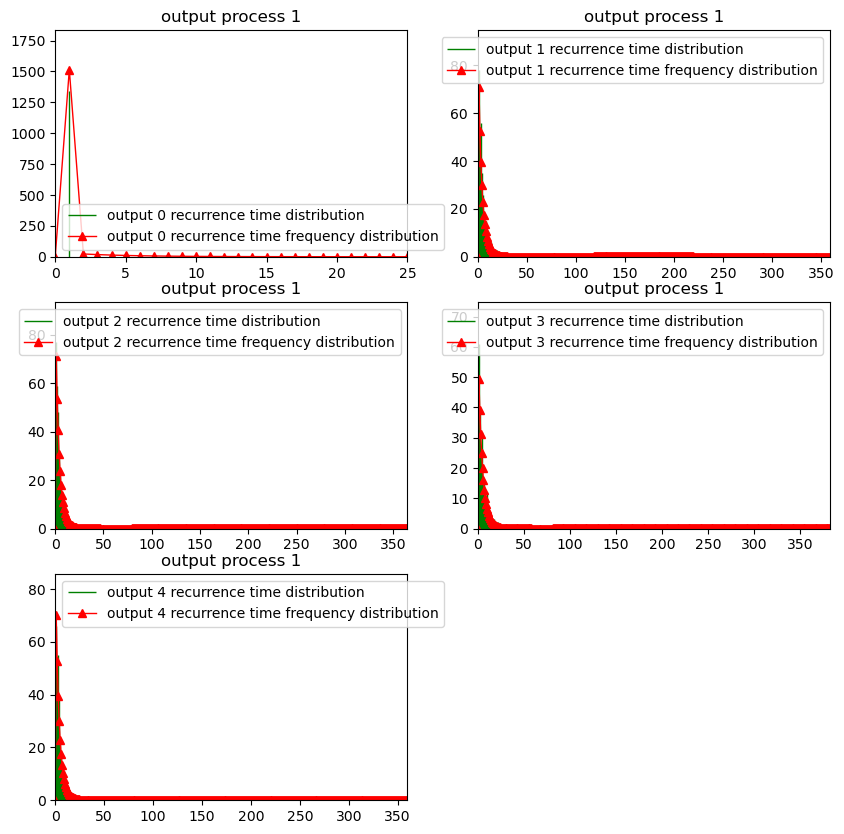

In [34]:
hsmc_est.plot("Recurrence", 1)


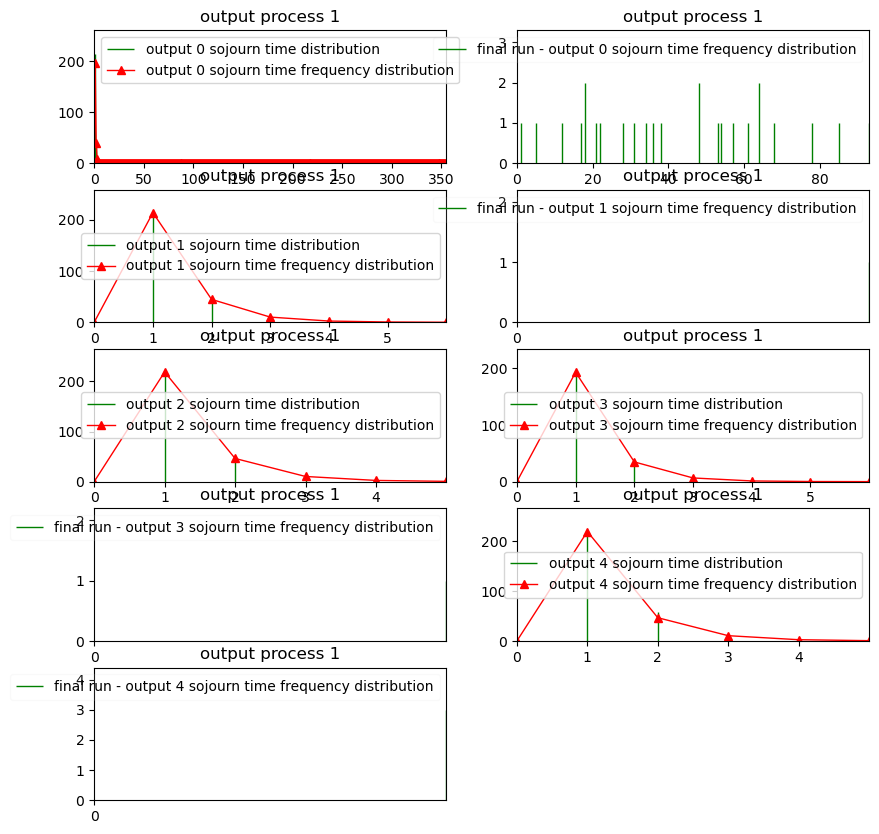

In [35]:
hsmc_est.plot("Sojourn", 1)


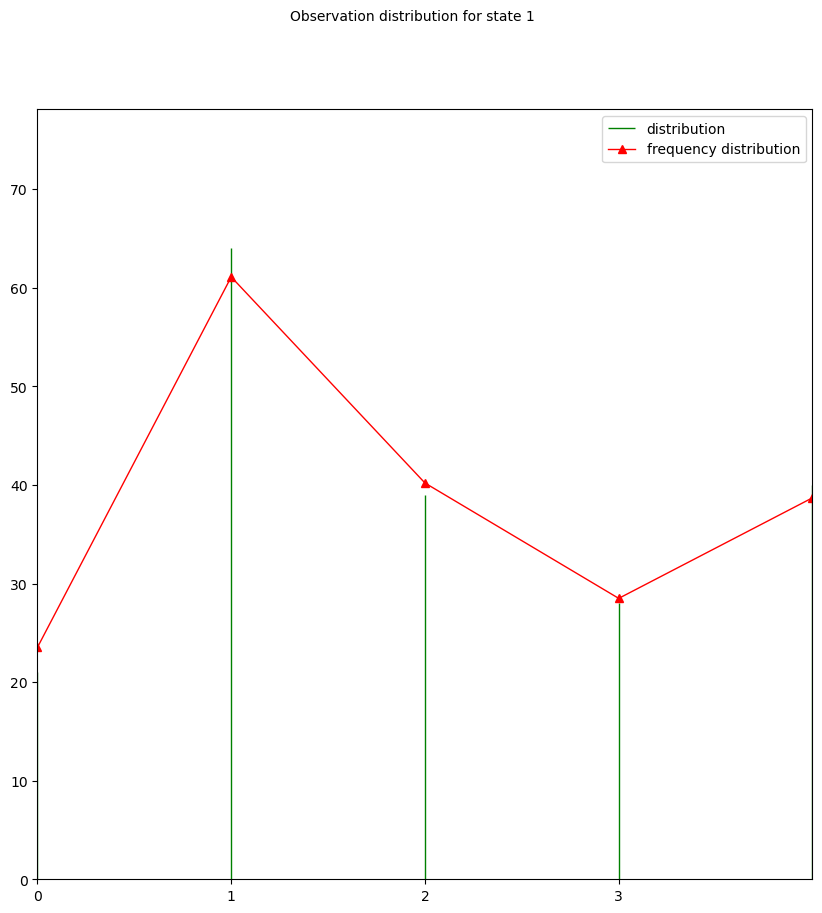

In [36]:
from openalea.sequence_analysis import seq_map
hsmc_est.extract(seq_map['Observation'],1,1).plot(Title="Observation distribution for state 1")

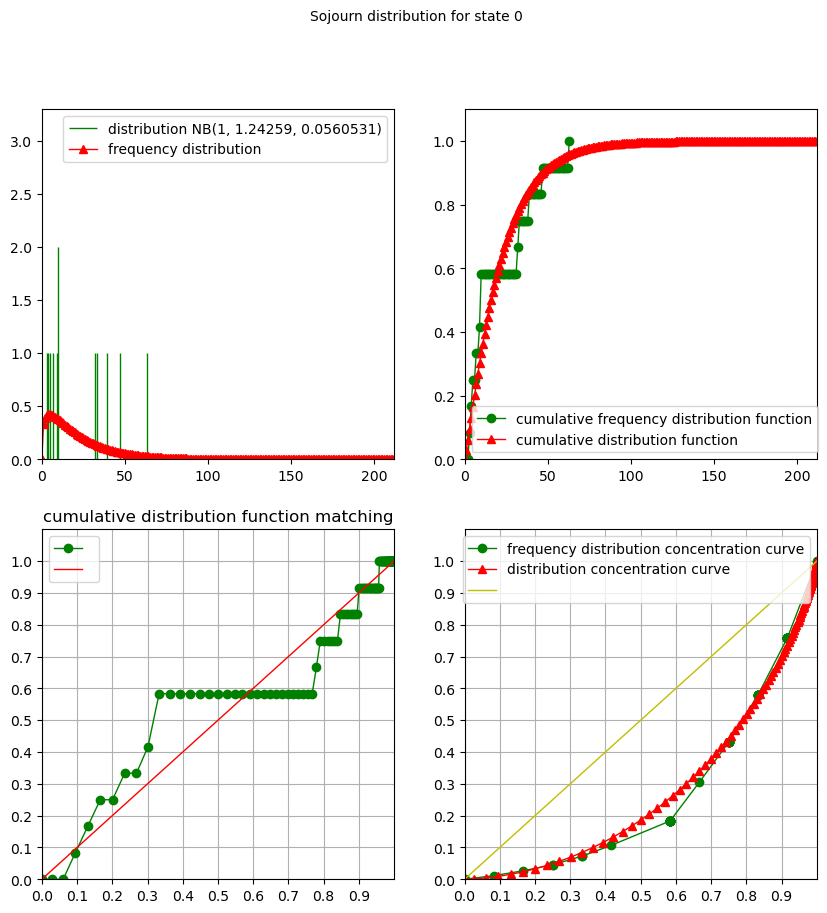

In [37]:
hsmc_est.extract(seq_map['Sojourn'],0,0).plot(Title="Sojourn distribution for state 0")

# Estimate HSMC with parametric emission distributions

In [128]:
model_file = "test_hidden_semi_markov_param.dat"

f = open(data_path + os.sep + model_file, "r")
f.close()

hsm = HiddenSemiMarkov(data_path + os.sep + model_file)

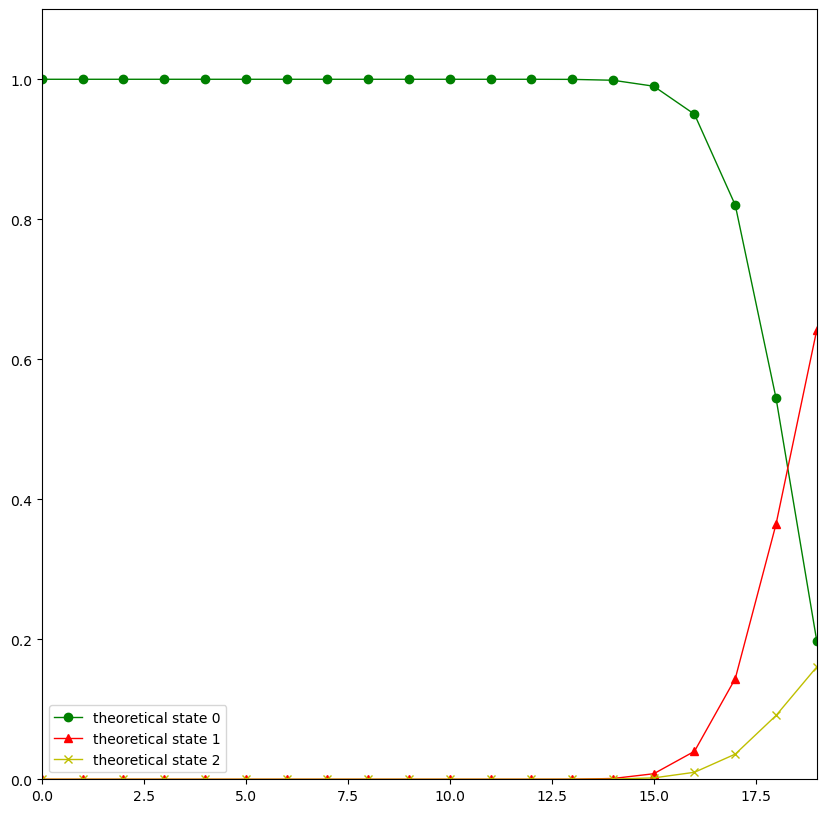

In [129]:
hsm.plot("Intensity", 0)  

In [130]:
set_seed(0)
nb_seq = 30
seq_length = 500
seq = hsm.simulation_nb_sequences(nb_seq, seq_length, True)
assert(len(seq) == nb_seq)
assert(len(seq[0]) == seq_length)
# NB: hsm has 1 output process but simulation includes the hidden state
assert(len(seq[0][1]) == 2)

nb_states = 3
obs = seq.select_variable([2], True)



N.o. initial states in parallel: 0

ERROR: 3 9.90768 10.7257

ERROR: 13 0.58303 -1186.59

ERROR: 15 1.03773e-15 -1092.42

ERROR: 19 5.9343 5.90129


In [131]:
hsmc_est = Estimate(obs, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300)

0
iteration 1   log-likelihood for the observed sequences: -83418.3
iteration 2   log-likelihood for the observed sequences: -61605.1
iteration 3   log-likelihood for the observed sequences: -44917.8
iteration 4   log-likelihood for the observed sequences: -40171.1
iteration 5   log-likelihood for the observed sequences: -1e+37

 Convergence failed, returning saved model with highest likelihood

5 iterations

complete/censored state occupancy weights
state 0: 0, 0
state 1: 0, 0
state 2: 0, 0

N.o. initial states in parallel: 0

log-likelihood for the state sequences: -40172.3 | -40172.3

posterior state sequence probability
sequence 1: 0.990092
sequence 2: 0.817015
sequence 3: 0.985866
sequence 4: 0.986438
sequence 5: 0.984957
sequence 6: 0.996672
sequence 7: 0.983564
sequence 8: 0.987378
sequence 9: 0.975652
sequence 10: 0.589754
sequence 11: 0.985768
sequence 12: 0.990928
sequence 13: 0.982602
sequence 14: 0.984363
sequence 15: 0.984156
sequence 16: 0.98134
sequence 17: 0.993964
sequ

In [132]:
print(hsmc_est.display())

HIDDEN_SEMI-MARKOV_CHAIN

3 STATES

INITIAL_PROBABILITIES
1e-05        0.999973     1.70881e-05  

TRANSITION_PROBABILITIES
0            0.286123     0.713877     
0.807751     0            0.192249     
0.209932     0.790068     0            

recurrent class: states 0 1 2

time up to the first occurrence of state 0 distribution
mean: 27.0295   median: 18   mode: 15
variance: 706.904   standard deviation: 26.5877   lower quartile: 14   upper quartile: 25

time up to the first occurrence of state 0 frequency distribution - sample size: 30
mean: 24.3667   median: 18.5   mode: 18.5
variance: 304.24   standard deviation: 17.4425   lower quartile: 18   upper quartile: 19

time up to the first occurrence of state 1 distribution
mean: 0   median: 0   mode: 0
variance: 0   standard deviation: 0

time up to the first occurrence of state 1 frequency distribution - sample size: 0

time up to the first occurrence of state 2 distribution
mean: 56.9857   median: 51   mode: 49
variance: 1265.56   st

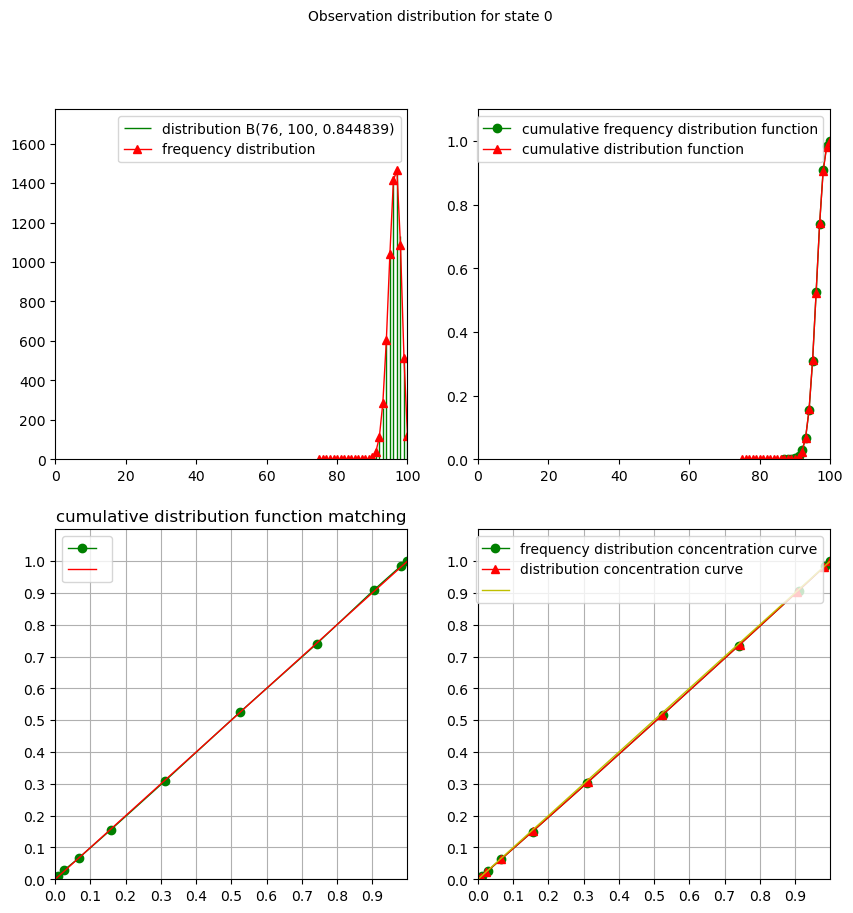

In [133]:
hsmc_est.extract(seq_map['Observation'],1,0).plot(Title="Observation distribution for state 0")

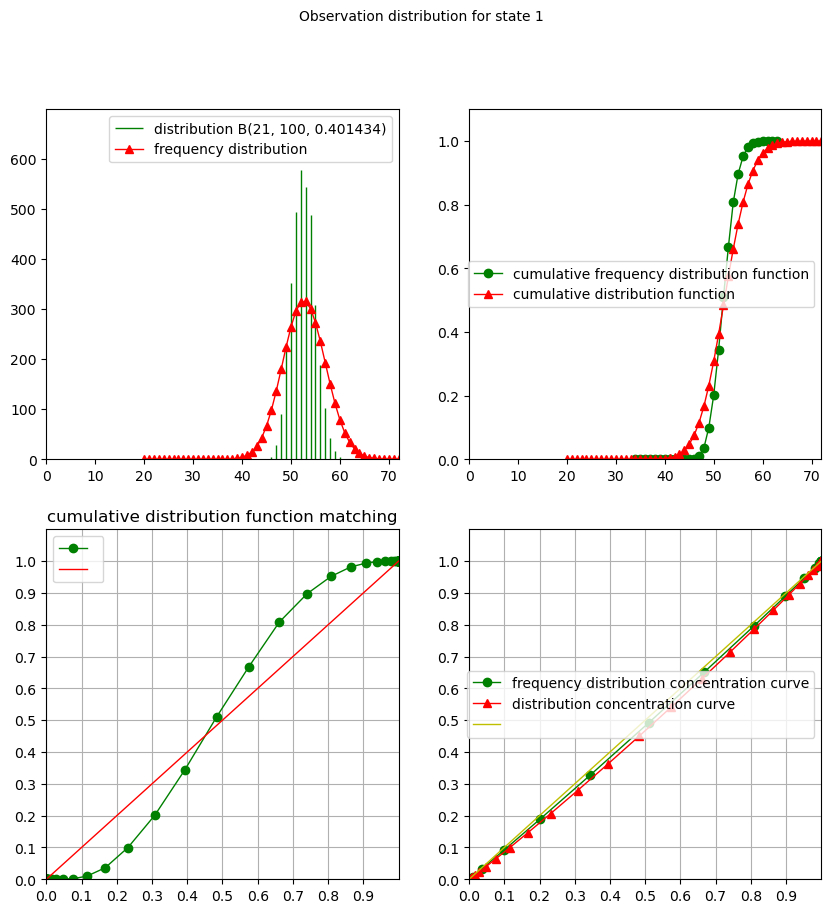

In [134]:
hsmc_est.extract(seq_map['Observation'],1,1).plot(Title="Observation distribution for state 1")

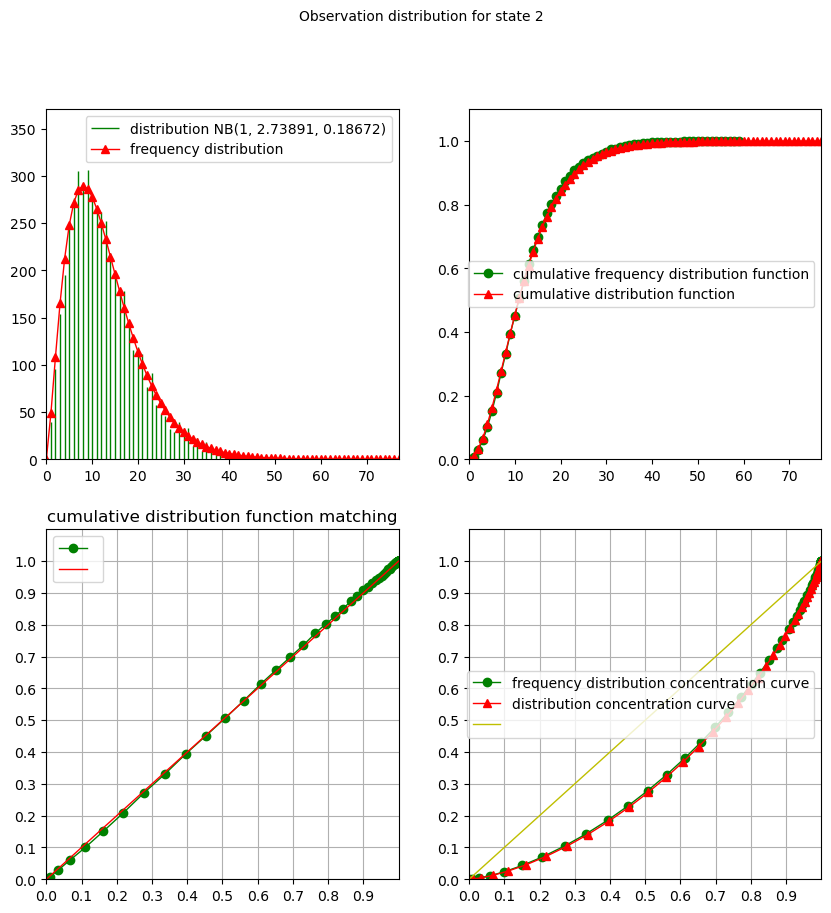

In [135]:
hsmc_est.extract(seq_map['Observation'],1,2).plot(Title="Observation distribution for state 2")